In [49]:
# Cargar múdulos necesarios
import numpy as np
import pandas as pd
# para graficas
import seaborn as sns
# para graficas
import matplotlib.pyplot as plt

In [50]:
ruta = './Mall_Customers-2.csv'
df = pd.read_csv(ruta, index_col=0)

In [51]:
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [52]:
df.rename({'Gender': 'Genero', 'Age': 'Edad', 'Annual Income (k$)': 'Ingreso', 'Spending Score (1-100)': 'Ponderacion'}, axis=1, inplace=True)
df.head()

,Genero,Edad,Ingreso,Ponderacion
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [53]:
# Resumend de datos / analisis descriptivo / variables tipo cuantitativo
df.describe()

,Edad,Ingreso,Ponderacion
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [54]:
df.groupby('Genero').size() # en el estudio hay 50 muestras de cada uno

Genero
Female    112
Male       88
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train, test = train_test_split(df, test_size = 0.4, stratify = df['Genero'], random_state = 19) # ingresamos los datos y cuando % queremos para entreno y despues para que informacion queremos la info, en este caso las especias, y metemos una semilla para obtener los mismos datos
train.head(10)

,Genero,Edad,Ingreso,Ponderacion
CustomerID,,,,
63,Female,67,47,52
124,Male,39,69,91
40,Female,20,37,75
6,Female,22,17,76
30,Female,23,29,87
27,Female,45,28,32
197,Female,45,126,28
174,Male,36,87,92
64,Female,54,47,59


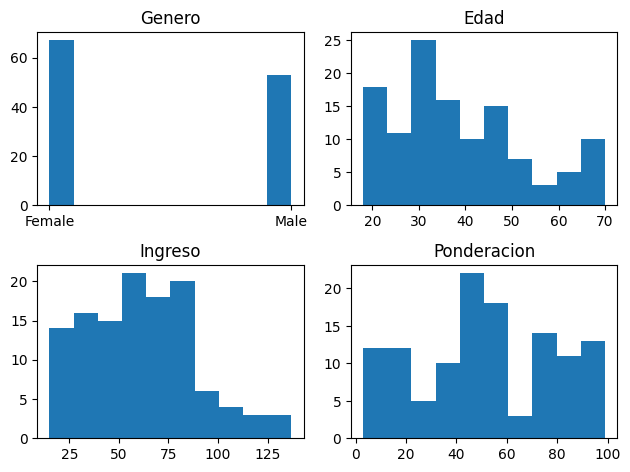

In [59]:
n_bins = 10
fig, axs = plt.subplots(2,2) # generamos el grafico de 2x2 donde se va a mostrar caracteristicas de cada una de las variables
axs[0,0].hist(train['Genero'], bins=n_bins)
axs[0,0].set_title("Genero")

axs[0,1].hist(train['Edad'], bins=n_bins)
axs[0,1].set_title("Edad")

axs[1,0].hist(train['Ingreso'], bins=n_bins)
axs[1,0].set_title("Ingreso")

axs[1,1].hist(train['Ponderacion'], bins=n_bins)
axs[1,1].set_title("Ponderacion")

fig.tight_layout(pad=1.0)

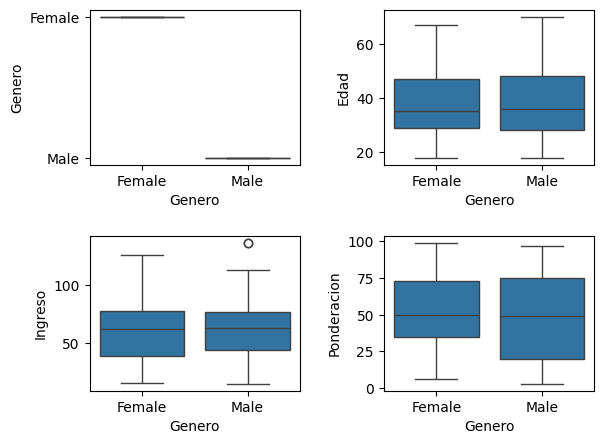

In [70]:
fn = ['Genero', 'Edad', 'Ingreso', 'Ponderacion']

fig, axs = plt.subplots(2,2) # creamos contendores

sns.boxplot(x = 'Genero', y = fn[0], data=train, ax=axs[0,0])
sns.boxplot(x = 'Genero', y = fn[1], data=train, ax=axs[0,1])
sns.boxplot(x = 'Genero', y = fn[2], data=train, ax=axs[1,0])
sns.boxplot(x = 'Genero', y = fn[3], data=train, ax=axs[1,1])

fig.tight_layout(pad=2.0)

C:\Users\pca20\AppData\Local\Temp\ipykernel_816\2905729167.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Genero', y=fn[2], data=train, order=cn, palette='Spectral')


<Axes: xlabel='Genero', ylabel='Ingreso'>

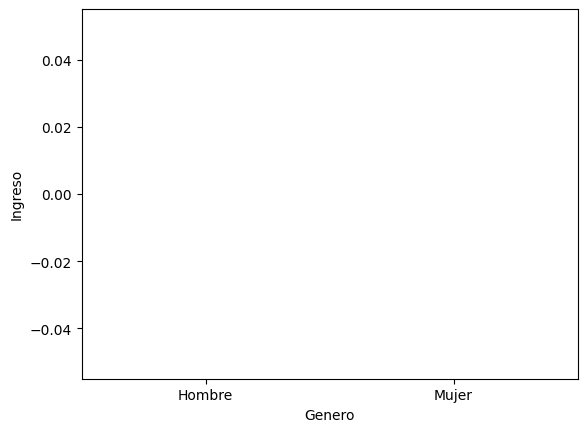

In [75]:
sns.violinplot(x='Genero', y=fn[2], data=train, order=cn, palette='Spectral')


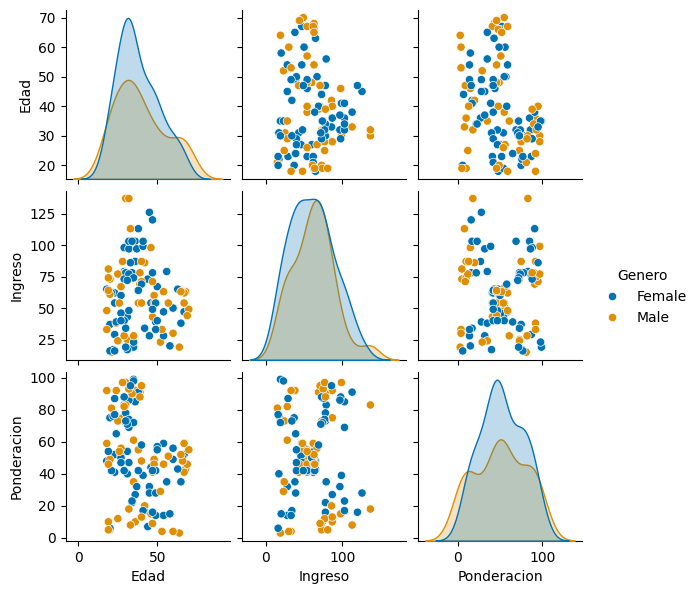

In [77]:
sns.pairplot(train, hue='Genero', height =2, palette = 'colorblind')

In [88]:
# Separación es entre objetivo y explicativas de cada grupo
# Variable objetivo seria las especies, y las explicaticas setian el ancho de tallo, petalo y esas cosas

# GRUPO DE ENTRENAMIENTO 
x_train = train[['Genero']] # variables explicativas
y_train = train['Genero'] # variables objetivo

# GRUPO DE PRUEBAS
x_test = test[['Genero']] # variables explicativas
y_test = test['Genero'] # variables objetivo

print(x_train.head(5))
print(x_train.head(5))

            Genero
CustomerID        
63          Female
124           Male
40          Female
6           Female
30          Female
            Genero
CustomerID        
63          Female
124           Male
40          Female
6           Female
30          Female


In [89]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [91]:
x_train_encoded = pd.get_dummies(x_train)
x_test_encoded = pd.get_dummies(x_test)

mod_dt = DecisionTreeClassifier(max_depth=3, random_state=1)
mod_dt.fit(x_train_encoded, y_train)


DecisionTreeClassifier(max_depth=3, random_state=1)

[Text(0.5, 0.75, 'Genero_Male <= 0.5\ngini = 0.493\nsamples = 120\nvalue = [67, 53]\nclass = Hombre'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 67\nvalue = [67, 0]\nclass = Hombre'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 53\nvalue = [0, 53]\nclass = Mujer')]

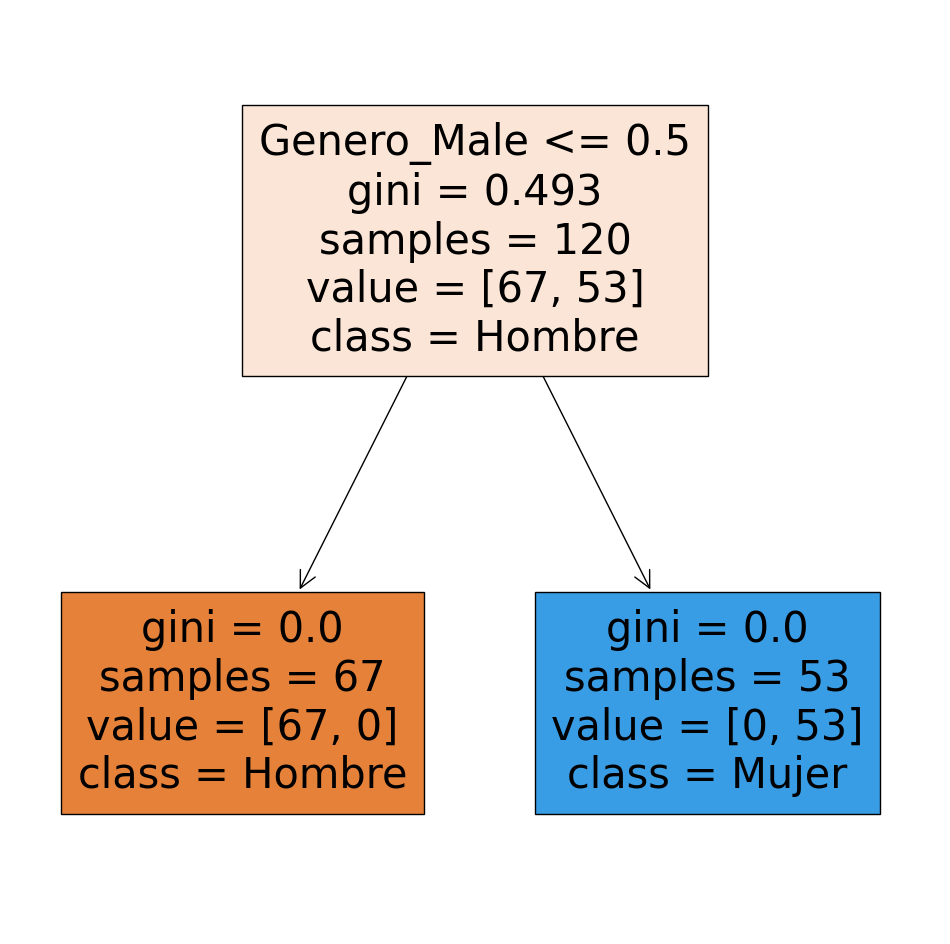

In [92]:
plt.figure(figsize=(12,12))
plot_tree(mod_dt, feature_names=mod_dt.feature_names_in_, class_names=cn, filled=True)

In [95]:
# Predecir resultados utilizando el modelo
x_test_encoded = pd.get_dummies(x_test)
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)
prediccion = mod_dt.predict(x_test_encoded)


In [96]:
from sklearn import metrics


In [98]:
print('La precisión del árbol de decisicón es: {:.3f}'.format(metrics.accuracy_score(prediccion, y_test)))

La precisión del árbol de decisicón es: 1.000


In [99]:
# Importancia de cada predictor
mod_dt.feature_importances_

array([0., 1.])

In [100]:
importancia_dt = pd.DataFrame({'Importancia': mod_dt.feature_importances_, 'Característica': mod_dt.feature_names_in_})
importancia_dt

,Importancia,Característica
0,0.0,Genero_Female
1,1.0,Genero_Male
